In [1]:
#Importing the required packages 
import pandas as pd 
import numpy as np 
import io
import requests 
import json
import sys
import tweepy
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## The below cells where run one time and then data was saved locally for ease of use and reproducbility

## The code can be run by changing the cell type 

# Gather 

# Importing all datasets 

# Asses 

In [2]:
#importing the twitter archieve
twitter_archive=pd.read_csv('./twitter-archive-enhanced.csv')

In [3]:
#importing the image prediction file 

image_prediction= pd.read_csv('./image_predictions_via_request')

In [4]:
#importing the twiter API data 

twitter_api=pd.read_csv('./twitter_API.csv')

In [5]:
#exploring each data set and noting down quality issue 


## Quality Issues

#### twitter_archive dataset <br>

- Null values in in_reply_to_status_id and in_reply_to_user_id columns <br>
- twitter id data type ( int to string)<br>
- All id columns data type (int to string)<br>
- Change timestamp column to timestamp <br> 
- Name column has names like a ,an and the <br>
- Delete retweets from the dataset<br>
- Extract correct ratings <br>

#### image_prediction dataset <br>
- twitter id data type <br> 

#### twitter_api dataset <br>
- drop place column 


## Tidiness issues 

#### twitter_archive dataset <br> 

- Dog state names should be one column <br> 
- Date and time should be in two different columns<br>
 
 
 #### twiter_api dataset <br>
- combine it with twitter archrive dataset<br>


In [6]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
563,802572683846291456,NaN,NaN,2016-11-26 18:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's h*ckin ferocious. Dandel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802572683...,12,10,Winnie,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1298,707741517457260545,NaN,NaN,2016-03-10 01:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your roommate eats your leftover Chili's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707741517...,10,10,None,None,None,None,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None


In [7]:
#pd.melt(twitter_archive_copy,id_vars=['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator','rating_denominator', 'name'],value_vars=['doggo', 'floofer', 'pupper', 'puppo'])

In [8]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive['text'].sample()

217    This is Leo. He's a personal triathlon coach. ...
Name: text, dtype: object

In [10]:
#most of this numbers have no meaning 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
twitter_archive['text'].duplicated().sum()

0

In [14]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [15]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
#Total value counts of all dog stage name is 394 

In [20]:
#Can see names like a the , an 
twitter_archive['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
Buddy            7
Bailey           7
Toby             7
an               7
Daisy            7
Leo              6
Milo             6
Dave             6
Stanley          6
Jack             6
Bella            6
Rusty            6
Scout            6
Oscar            6
Jax              6
Koda             6
Sammy            5
              ... 
Alfy             1
Clarq            1
Shakespeare      1
Herb             1
Terrenth         1
Chesney          1
Tayzie           1
Zooey            1
Callie           1
Durg             1
Willem           1
Jett             1
Barry            1
Daniel           1
Bruno            1
Jaspers          1
Stuart           1
Jackie           1
Jessiga          1
Tedders          1
Dwight           1
Severus     

In [21]:
(twitter_archive['name']=='the').sum()

8

In [22]:
#exploring image prediction dataset 
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
1051,713919462244790272,https://pbs.twimg.com/media/CehZ9mLWsAAsn28.jpg,1,Siberian_husky,0.463223,True,Eskimo_dog,0.389959,True,malamute,0.097963,True
1268,749417653287129088,https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg,2,papillon,0.772894,True,Shetland_sheepdog,0.042408,True,collie,0.042313,True
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,True,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True


In [23]:
#data types look ok apart from tweet id for which note has been made to convet it into string 

image_prediction.dtypes


tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [24]:
image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [28]:
image_prediction.info()
#no missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
#exporing the twiter_api dataset 
twitter_api.head()

,favorite_count,in_reply_to_status_id,in_reply_to_user_id,place,retweet_count,retweeted,tweet_id
0,37023,NaN,NaN,NaN,7899,False,892420643555336193
1,31860,NaN,NaN,NaN,5870,False,892177421306343426
2,23996,NaN,NaN,NaN,3874,False,891815181378084864
3,40356,NaN,NaN,NaN,8065,False,891689557279858688
4,38562,NaN,NaN,NaN,8735,False,891327558926688256


In [31]:
twitter_api.dtypes

favorite_count             int64
in_reply_to_status_id    float64
in_reply_to_user_id      float64
place                     object
retweet_count              int64
retweeted                   bool
tweet_id                   int64
dtype: object

In [32]:
twitter_api.info()
#no missing values in favorites count and retweet count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
favorite_count           2333 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
place                    1 non-null object
retweet_count            2333 non-null int64
retweeted                2333 non-null bool
tweet_id                 2333 non-null int64
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 111.7+ KB


In [33]:
twitter_api['retweeted'].unique()

array([False], dtype=bool)

# Clean 

In [34]:
# making copies of our dataset for cleaning

image_prediction_copy=image_prediction.copy()
twitter_archive_copy=twitter_archive.copy()
twitter_api_copy=twitter_api.copy()

#  Define

In [35]:

## Null values in in_reply_to_status_id and in_reply_to_user_id 

## The amount of non-null values are very less compared to total dataset points in the twitter_archive dataset . 
## Also we could not get any information on those colums from twitter_api so I think deleteling those columns would be our best bet. 

# Also droping other columns like retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp as there is more than 50% null values in them 
## use drop function from pandas make inplace = True and axis=1

# Code 

In [36]:
twitter_api_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)
twitter_archive_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [37]:
twitter_archive_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

# Test

In [38]:
# We see that the concerned columns have all gone 
twitter_archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [39]:
#We see that the concerned columns have gone 
twitter_api_copy.head(2)

,favorite_count,place,retweet_count,retweeted,tweet_id
0,37023,NaN,7899,False,892420643555336193
1,31860,NaN,5870,False,892177421306343426


# Define

In [40]:
# Using astype function in python convert int to string 

# Code 

In [41]:
twitter_archive_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype(str)
twitter_api_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype(str)
image_prediction_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype(str)

# Test 

In [42]:
twitter_archive_copy.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [43]:
image_prediction_copy.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [44]:
twitter_api.dtypes

favorite_count             int64
in_reply_to_status_id    float64
in_reply_to_user_id      float64
place                     object
retweet_count              int64
retweeted                   bool
tweet_id                   int64
dtype: object

# Define 

In [45]:
# convert datetime column into date time object 

# use pandas pd.datetime function to convent it 

# Code

In [46]:
twitter_archive_copy['timestamp']=pd.to_datetime(twitter_archive_copy['timestamp'])

# Test 

In [47]:
twitter_archive_copy.dtypes
# We see that we where able to convert the data type 

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

# Define 

In [48]:
# To drop place column in twitter api columns 

# use the drop function of pandas with axis=1 and inplace = True 

# Code 

In [49]:
twitter_api_copy.drop(columns=['place'],inplace=True,axis=1)

# Test 

In [50]:
twitter_api_copy.head()
# no 'place' column in the dataframe below 

,favorite_count,retweet_count,retweeted,tweet_id
0,37023,7899,False,892420643555336193
1,31860,5870,False,892177421306343426
2,23996,3874,False,891815181378084864
3,40356,8065,False,891689557279858688
4,38562,8735,False,891327558926688256


# Define 

In [51]:
# separating date and time from time colum in twitter_archive_copy dataset 

# use .dt.date and dt.time function to seperate the values 

# Code 

In [52]:
twitter_archive_copy['date']=twitter_archive_copy['timestamp'].dt.date
twitter_archive_copy['time']=twitter_archive_copy['timestamp'].dt.time

# Test 

In [53]:
twitter_archive_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1832,676191832485810177,2015-12-14 00:07:50,"<a href=""http://twitter.com/download/iphone"" r...",These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,10,10,None,None,None,None,None,2015-12-14,00:07:50
625,795400264262053889,2016-11-06 22:59:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's trying to make the same fa...,https://twitter.com/dog_rates/status/795400264...,12,10,Brody,None,None,None,None,2016-11-06,22:59:35
2122,670403879788544000,2015-11-28 00:48:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,None,None,None,None,2015-11-28,00:48:35
1312,707014260413456384,2016-03-08 01:25:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She requests to be carried arou...,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,None,None,None,None,2016-03-08,01:25:10
237,847157206088847362,2017-03-29 18:43:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's been pup for adoption for mo...,"https://www.petfinder.com/petdetail/37334596,h...",11,10,Daisy,None,None,None,None,2017-03-29,18:43:12


In [54]:
# dropping the original columns 

twitter_archive_copy.drop(columns=['timestamp'],inplace=True,axis=1)

In [55]:
twitter_archive_copy.sample(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
303,836397794269200385,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,None,None,None,None,2017-02-28,02:09:08


# Define 

In [56]:
# Using a custome built code to make the dog stage column 

# code 

In [57]:
# Sorting particular dog_stage values into each dataset 

doggo=twitter_archive_copy[twitter_archive_copy['doggo']=='doggo']

floofer=twitter_archive_copy[twitter_archive_copy['floofer']=='floofer']

pupper=twitter_archive_copy[twitter_archive_copy['pupper']=='pupper']

puppo=twitter_archive_copy[twitter_archive_copy['puppo']=='puppo']

#Nan=twitter_archive_copy[(twitter_archive_copy['puppo']!='puppo') & (twitter_archive_copy['pupper']!='pupper')&(twitter_archive_copy['doggo']!='doggo')&(twitter_archive_copy['floofer']!='floofer')]

In [58]:
floofer.count()

tweet_id              10
source                10
text                  10
expanded_urls         10
rating_numerator      10
rating_denominator    10
name                  10
doggo                 10
floofer               10
pupper                10
puppo                 10
date                  10
time                  10
dtype: int64

In [59]:
pupper.count()

tweet_id              257
source                257
text                  257
expanded_urls         255
rating_numerator      257
rating_denominator    257
name                  257
doggo                 257
floofer               257
pupper                257
puppo                 257
date                  257
time                  257
dtype: int64

In [60]:
puppo.count()

tweet_id              30
source                30
text                  30
expanded_urls         29
rating_numerator      30
rating_denominator    30
name                  30
doggo                 30
floofer               30
pupper                30
puppo                 30
date                  30
time                  30
dtype: int64

In [61]:
doggo.count()

tweet_id              97
source                97
text                  97
expanded_urls         94
rating_numerator      97
rating_denominator    97
name                  97
doggo                 97
floofer               97
pupper                97
puppo                 97
date                  97
time                  97
dtype: int64

In [62]:
# We see that the count  of total stage name row is equal to 394 which is same as we saw during asses stage above 

In [63]:
# Adding stage columns to each sliced data frame 
pupper['dog_stage']='pupper'

doggo['dog_stage']='doggo'

floofer['dog_stage']='floofer'

puppo['dog_stage']='puppo'



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [64]:
#Concatinating individual dataframe 
combine=pd.concat([pupper,puppo,doggo,floofer],ignore_index=True)

In [65]:
# In this combine dataset some columns are repeated twice since in some columns there where two dog stage names 

In [66]:
combine['tweet_id'].duplicated().sum()

14

In [67]:
combine=combine[['tweet_id','dog_stage']]
# Keeping columns which are required only 

In [68]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
tweet_id     394 non-null object
dog_stage    394 non-null object
dtypes: object(2)
memory usage: 6.2+ KB


In [69]:
combine[combine['tweet_id'].duplicated(keep=False)].index

Int64Index([ 27,  34,  37,  38,  49,  50,  57,  62,  67,  72,  88,  95, 263,
            294, 295, 324, 329, 330, 332, 339, 343, 346, 351, 357, 365, 374,
            378, 385],
           dtype='int64')

In [70]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
tweet_id     394 non-null object
dog_stage    394 non-null object
dtypes: object(2)
memory usage: 6.2+ KB


In [71]:
twitter_archive_copy=pd.merge(twitter_archive_copy,combine,how='left',on='tweet_id')

In [72]:
twitter_archive_copy['tweet_id'].duplicated().sum()

14

In [73]:
twitter_archive_copy[twitter_archive_copy['tweet_id'].duplicated(keep=False)].index

Int64Index([ 191,  192,  201,  202,  462,  463,  534,  535,  569,  570,  580,
             581,  711,  712,  740,  741,  786,  787,  831,  832,  899,  900,
             967,  968, 1075, 1076, 1126, 1127],
           dtype='int64')

In [74]:
# Deleting all above rows since they have two stage names in the text 
twitter_archive_copy.drop(index=[191,  192,  201,  202,  462,  463,  534,  535,  569,  570,  580,581,  711,  712,  740,  741,  786,  787,  831,  832,  899,  900,
                                 967,  968, 1075, 1076, 1126, 1127 ],inplace=True)

In [75]:
#Just a record for keeping this function 
#pd.testing.assert_frame_equal(twitter_archive_copy,twitter_archive_copy2.drop(columns='dog_stage',axis=1))

In [76]:
#Just a record of keeping this functions 
#twitter_archive_copy.index.symmetric_difference(twitter_archive_copy2.index)

In [77]:
twitter_archive_copy.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
282,839549326359670784,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None,2017-03-08,18:52:12,NaN
269,841680585030541313,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None,2017-03-14,16:01:03,NaN
2128,670433248821026816,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,None,None,None,None,2015-11-28,02:45:17,NaN
404,824325613288833024,"<a href=""http://twitter.com/download/iphone"" r...",Retweet the h*ck out of this 13/10 pupper #Bel...,https://twitter.com/dog_rates/status/824325613...,13,10,None,None,None,pupper,None,2017-01-25,18:38:36,pupper
720,784183165795655680,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo,2016-10-07,00:06:50,puppo


In [78]:
# Now need to fill all Nan values with None 
twitter_archive_copy['dog_stage'].fillna('None',inplace=True)


In [79]:
twitter_archive_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2369
Data columns (total 14 columns):
tweet_id              2342 non-null object
source                2342 non-null object
text                  2342 non-null object
expanded_urls         2283 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  2342 non-null object
doggo                 2342 non-null object
floofer               2342 non-null object
pupper                2342 non-null object
puppo                 2342 non-null object
date                  2342 non-null object
time                  2342 non-null object
dog_stage             2342 non-null object
dtypes: int64(2), object(12)
memory usage: 274.5+ KB


In [80]:
twitter_archive_copy.drop(columns=['doggo','puppo','floofer','pupper'],inplace=True,axis=1)

# Test 

In [81]:
twitter_archive_copy.sample(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
1617,685943807276412928,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,8,10,the,2016-01-09,21:58:42,pupper
262,842892208864923648,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,2017-03-18,00:15:37,None
2099,670804601705242624,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,2015-11-29,03:20:54,None
707,786051337297522688,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,13,10,None,2016-10-12,03:50:17,puppo
1863,675781562965868544,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,https://twitter.com/dog_rates/status/675781562...,11,10,Buddah,2015-12-12,20:57:34,None
270,841439858740625411,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14,10,None,2017-03-14,00:04:30,None
1733,680161097740095489,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,2015-12-24,23:00:17,None
481,815966073409433600,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,https://twitter.com/dog_rates/status/815966073...,13,10,None,2017-01-02,17:00:46,pupper
14,889531135344209921,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,2017-07-24,17:02:04,puppo
388,826615380357632002,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,https://twitter.com/dog_rates/status/809920764...,10,10,None,2017-02-01,02:17:19,None


In [82]:
# Resetting index of the dataframe 

twitter_archive_copy.reset_index(drop=True,inplace=True)

In [83]:
twitter_archive_copy.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,None


# Define 

In [84]:
# To remove Retweets from the dataset using the text column and regular expression 

#Retweet text always starts from RT we can leverage this fact in droping those rowls 

# Code 

In [85]:
#Defining counter 
i=0
num_of_retweets=0

In [86]:
#Writing a loop to extract only retweet columns 
for text in twitter_archive_copy['text']:
    if(text.split()[0]=='RT'):
        num_of_retweets=num_of_retweets+1
        twitter_archive_copy.drop([i],axis=0,inplace=True)
    i=i+1
      
   

In [87]:
num_of_retweets


181

# Test 

In [88]:

#number of rows have gone down by 181
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2341
Data columns (total 10 columns):
tweet_id              2161 non-null object
source                2161 non-null object
text                  2161 non-null object
expanded_urls         2103 non-null object
rating_numerator      2161 non-null int64
rating_denominator    2161 non-null int64
name                  2161 non-null object
date                  2161 non-null object
time                  2161 non-null object
dog_stage             2161 non-null object
dtypes: int64(2), object(8)
memory usage: 185.7+ KB


In [89]:
#Not RT in the dataframe remain 
#No out put signifies we have successfully removed retweets from the dataset 

for text in twitter_archive_copy['text']:
    if(text.split()[0]=='RT'):
        print(text)

# Define 

In [90]:
# To see if correct names like an a and the in the names columns of the dataset 

In [91]:

name_ls=[]
for name in twitter_archive_copy['name']:
    name_ls.append(name)
    


# Code 

In [92]:
twitter_archive_copy['name_extracted']='None'
i=0
# Let split test into words using a loop 
for text in twitter_archive_copy['text']:    # Loop over each text cell 
    if((name_ls[i]=='a') | (name_ls[i]=='an')| (name_ls[i]=='the')): # if name = a or an or the 
        for word in text.split():          # split text into word array 
            if(re.match(r'[A-Z][a-z]*[\.,]' ,word)):   #correcting using regx to come up with a match 
                twitter_archive_copy['name_extracted'].iloc[[i]]=word
    else:
        twitter_archive_copy['name_extracted'].iloc[[i]]=name_ls[i]
    i=i+1
  

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Test 

In [93]:
# Even though the above code does not correct all wrong names in it has an efficiency of almost ~87%. This is because the 
# has no fixed rules on wirting text 

#Below I am showing that a , an and the name boxes are corrected upto 87% efficiency 



In [94]:
twitter_archive_copy[(twitter_archive_copy['name_extracted']=='a')| (twitter_archive_copy['name_extracted']=='an')| (twitter_archive_copy['name_extracted']=='the')]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,name_extracted


# Define 

In [95]:
# Extracing the numercial rating from the text column using reg expression 

In [96]:
twitter_archive_copy['numerator_rating_extracted']='None'
twitter_archive_copy['denominator_rating_extracted']='None'


In [97]:
i=0
# Let split test into words using a loop 
for text in twitter_archive_copy['text']:    # Loop over each text cell
    for word in text.split():
        #print(word)
        if(re.match(r'\d+\.?\d*?\/\d+',word)):
            twitter_archive_copy['numerator_rating_extracted'].iloc[[i]]=word.split("/")[0]
            twitter_archive_copy['denominator_rating_extracted'].iloc[[i]]=word.split("/")[1]
    i=i+1
                
    

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [98]:
twitter_archive_copy.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,name_extracted,numerator_rating_extracted,denominator_rating_extracted
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,Phineas,13,10
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None,Tilly,13,10
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,None,Archie,12,10
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,None,Darla,13,10
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,None,Franklin,12,10


In [99]:
# Final cleaning this dataset 

In [100]:
# Dropping unwanted columns 

twitter_archive_copy.drop(columns=['source','name','expanded_urls','rating_numerator','rating_denominator'],inplace=True,axis=1)

In [101]:
twitter_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
retweeted         2333 non-null bool
tweet_id          2333 non-null object
dtypes: bool(1), int64(2), object(1)
memory usage: 57.0+ KB


In [102]:
# Deleting unwanted columns from twitter_api dataset 
twitter_api_copy.drop(columns=['retweeted'],inplace=True,axis=1)

In [103]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2341
Data columns (total 8 columns):
tweet_id                        2161 non-null object
text                            2161 non-null object
date                            2161 non-null object
time                            2161 non-null object
dog_stage                       2161 non-null object
name_extracted                  2161 non-null object
numerator_rating_extracted      2161 non-null object
denominator_rating_extracted    2161 non-null object
dtypes: object(8)
memory usage: 151.9+ KB


In [104]:
# Merging the above two dataset on tweet_id
# We are going to consider only tweets which are in twitter_archive_copy and hence doing an inner joint to get the tweets at their intersection 

In [105]:
twitter_weratedogs=pd.merge(twitter_archive_copy,twitter_api_copy,how='inner',on='tweet_id')

In [106]:
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2137
Data columns (total 10 columns):
tweet_id                        2138 non-null object
text                            2138 non-null object
date                            2138 non-null object
time                            2138 non-null object
dog_stage                       2138 non-null object
name_extracted                  2138 non-null object
numerator_rating_extracted      2138 non-null object
denominator_rating_extracted    2138 non-null object
favorite_count                  2138 non-null int64
retweet_count                   2138 non-null int64
dtypes: int64(2), object(8)
memory usage: 183.7+ KB


In [107]:
twitter_weratedogs.head()

,tweet_id,text,date,time,dog_stage,name_extracted,numerator_rating_extracted,denominator_rating_extracted,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,16:23:56,None,Phineas,13,10,37023,7899
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01,00:17:27,None,Tilly,13,10,31860,5870
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31,00:18:03,None,Archie,12,10,23996,3874
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30,15:58:51,None,Darla,13,10,40356,8065
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29,16:00:24,None,Franklin,12,10,38562,8735


In [108]:
# Saving the file 

twitter_weratedogs.to_csv('./twitter_weratedogs.csv',index=False)

# Data Visulization 

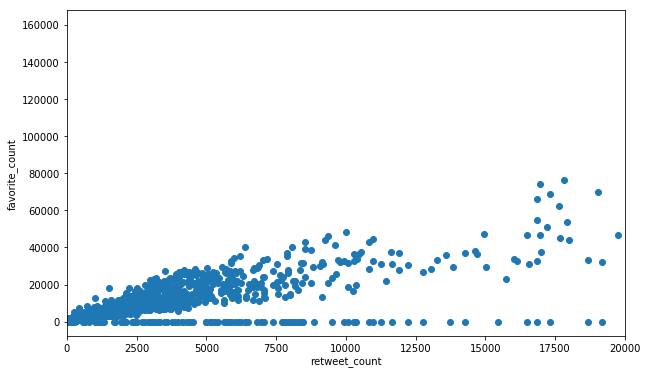

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(data=twitter_weratedogs,x='retweet_count',y='favorite_count');
plt.xlim((0,20000)) #focusing on data upto 20,000 retweets 
#plt.ylim((0,12000))
plt.xlabel('retweet_count');
plt.ylabel('favorite_count');

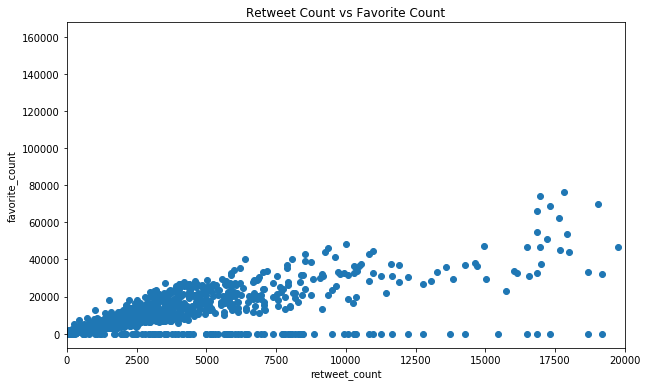

In [110]:
plt.figure(figsize=(10,6))
plt.scatter(data=twitter_weratedogs,x='retweet_count',y='favorite_count');
plt.xlim((0,20000)) #focusing on data upto 20,000 retweets 
plt.title('Retweet Count vs Favorite Count')
plt.xlabel('retweet_count');
plt.ylabel('favorite_count');

We can see a strong positive co-relation between retweet_count and favorite_count 

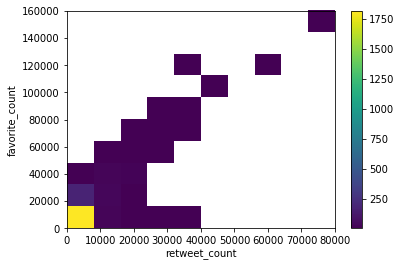

In [111]:
plt.hist2d(x=twitter_weratedogs['retweet_count'],y=twitter_weratedogs['favorite_count'],cmin=0.5,cmap='viridis');
plt.colorbar()
plt.xlabel('retweet_count');
plt.ylabel('favorite_count');

This shows us the density of data points which are in the dataset . We can see most data points lie between 8000 retweet_count and 18000 favorite count

In [112]:
#In the image classification data set lets compare the number of correct prediction vs 
#number of wrong prediction for p1,p2 and p3 

In [113]:
image_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [114]:
# To check on which number of image is the maxed used 

In [115]:
sns.set(style="whitegrid")

Text(0.5,1,'Image classification accuracy depending on Image number for p1_dog')

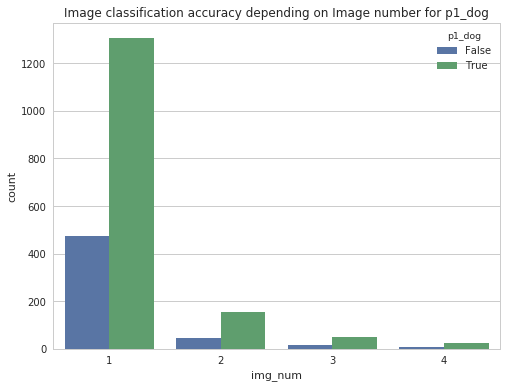

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(data=image_prediction_copy,x='img_num',hue='p1_dog')
plt.title('Image classification accuracy depending on Image number for p1_dog')


Looks like the classification error is the same irrespective of the image number which is shown

In [117]:
twitter_weratedogs.head()

,tweet_id,text,date,time,dog_stage,name_extracted,numerator_rating_extracted,denominator_rating_extracted,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,16:23:56,None,Phineas,13,10,37023,7899
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01,00:17:27,None,Tilly,13,10,31860,5870
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31,00:18:03,None,Archie,12,10,23996,3874
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30,15:58:51,None,Darla,13,10,40356,8065
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29,16:00:24,None,Franklin,12,10,38562,8735


In [118]:
twitter_weratedogs['date'].max(),twitter_weratedogs['date'].min()

(datetime.date(2017, 8, 1), datetime.date(2015, 11, 16))

In [119]:
twitter_weratedogs['month']=pd.DatetimeIndex(twitter_weratedogs['date']).month

In [120]:
twitter_weratedogs['year']=pd.DatetimeIndex(twitter_weratedogs['date']).year

In [121]:
twitter_weratedogs['month'].replace({1:"Jan",2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

Text(0.5,1,'Distribution of post during various months over 3 years ')

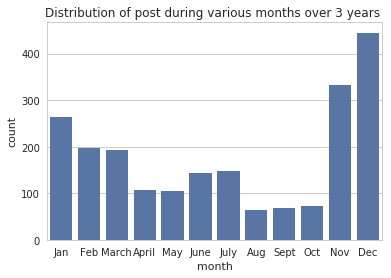

In [122]:
color=sns.color_palette()[0]
label=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
fig=sns.countplot(data=twitter_weratedogs,x='month',color=color,order=label)
plt.title('Distribution of post during various months over 3 years ')


Text(0.5,1,'Distribution of post over 3 years ')

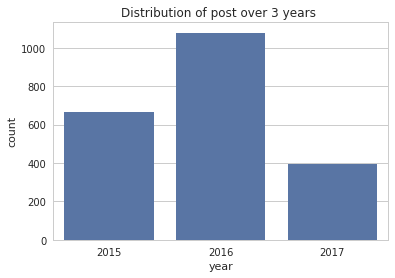

In [123]:
fig=sns.countplot(data=twitter_weratedogs,x='year',color=color)
plt.title('Distribution of post over 3 years ')

Thus we see that the most twitter post are generated during last two month of the year <br>
Also most post where generated during the year 2016 <br>

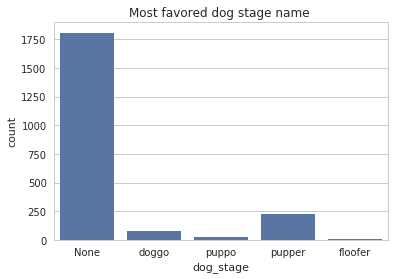

In [124]:
fig=sns.countplot(data=twitter_weratedogs,x='dog_stage',color=color)
plt.title('Most favored dog stage name ');

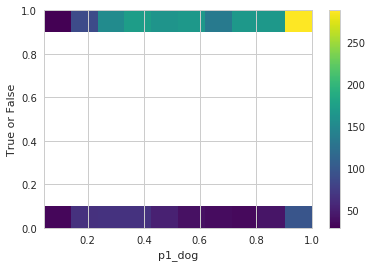

In [125]:
plt.hist2d(data=image_prediction_copy,x='p1_conf',y='p1_dog',cmap='viridis',cmin=0.5)
plt.colorbar()
plt.xlabel('p1_dog');
plt.ylabel('True or False');

- We see that usually high confidence by neural network is associated with it being right as indicated by the density of points at right side of the graph . That is more points associated with higher probability are generally true

# Conclusion

- Pupper is most used dog name after none <br>
- Most post are posted in the year 2016 <br>
- Most post are posted in the months of December and November <br>
- Dataset has twitter post from 2015-11-16 to 2017-08-01<br>
- Neural network is not baised towards the image number shown to it <br>
- There is positive corelation between retweet_count and favorite_count <br>
- We see that usually high confidence by neural network is associated with it being right as indicated by the density of points at right side of the graph . That is more points associated with higher probability are generally true